<a href="https://colab.research.google.com/github/NatashaCamargo/TensorFlow2_0/blob/main/Linear_Classification_beast_cancer_TF20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
# load in the data
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
type(data)
# bunch objs actualli work like a dictionary

sklearn.utils._bunch.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
data.data.shape

(569, 30)

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
data.target.shape

(569,)

In [12]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)


In [14]:
N, D = X_train.shape

In [15]:
N, D

(381, 30)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# keras cause tthis is the way for TF2.0
# this is the way!
# here we just want the size of D, we ignore N cause models can have arbitrary 
# no of samples
# output will be 1 can we only have 1...
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
'''Alternative: create a sequential model with nothing on it
and add layers later on AND you can specify the input shape 
inside the first Dense

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid))
''' 


"Alternative: create a sequential model with nothing on it\nand add layers later on AND you can specify the input shape \ninside the first Dense\n\nmodel = tf.keras.models.Sequential()\nmodel.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid))\n"

In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 29ms/step - loss: 0.8917 - accuracy: 0.2966 - val_loss: 0.9174 - val_accuracy: 0.2926
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7924 - accuracy: 0.3596 - val_loss: 0.8177 - val_accuracy: 0.3830
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7017 - accuracy: 0.5013 - val_loss: 0.7326 - val_accuracy: 0.5053
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6269 - accuracy: 0.6325 - val_loss: 0.6595 - val_accuracy: 0.6064
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5628 - accuracy: 0.7559 - val_loss: 0.5992 - val_accuracy: 0.7394
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5090 - accuracy: 0.8320 - val_loss: 0.5505 - val_accuracy: 0.7819
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4656 - accuracy: 0.8740 - val_loss: 0.5099 - val_accuracy: 0.8457
Epoch 8/100


In [24]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 3ms/step - loss: 0.0959 - accuracy: 0.9764
Train score: [0.0958734080195427, 0.9763779640197754]
6/6 [==============================] - 0s 3ms/step - loss: 0.1287 - accuracy: 0.9787
Test score: [0.12873771786689758, 0.978723406791687]


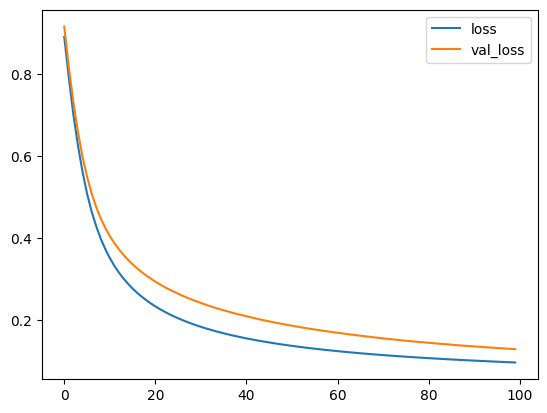

In [25]:
# plot the loss ad accuracy per epoch to see the progress of the training process
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss') # train loss
plt.plot(r.history['val_loss'], label='val_loss') #test loss
plt.legend();

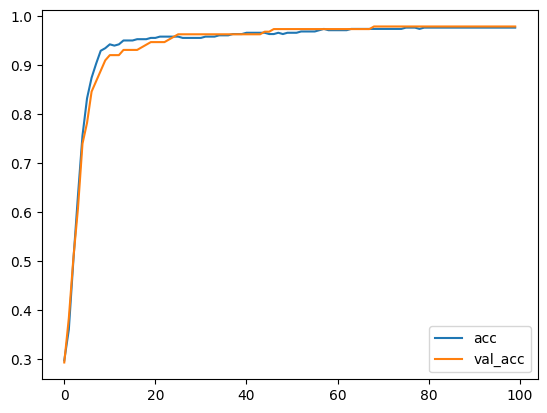

In [26]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();